In [ ]:
Variables principales :

Caractéristiques techniques :
battery_power : Puissance de la batterie
clock_speed : Vitesse du processeur
int_memory : Mémoire interne
ram : Mémoire RAM
n_cores : Nombre de cœurs du processeur

Caractéristiques d'affichage :
px_height : Hauteur en pixels
px_width : Largeur en pixels
sc_h : Hauteur de l'écran
sc_w : Largeur de l'écran

Fonctionnalités (variables binaires 0/1) :
blue : Bluetooth
dual_sim : Double SIM
four_g : 4G
three_g : 3G
touch_screen : Écran tactile
wifi : WiFi

Variable cible :
price_range : Classification du prix (0 à 3, où 0 = bas de gamme, 3 = haut de gamme)

In [4]:
# 1. Data Loading and Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Chargement des données
df = pd.read_csv('DATASET/train.csv')

# Exploration initiale
print("Structure du dataset :")
print(df.info())
print("\nAperçu des données :")
print(df.head())
print("\nStatistiques descriptives :")
print(df.describe())

Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null 

In [5]:
# 2. Data Cleaning and Preprocessing
# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isnull().sum())


Valeurs manquantes :
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
# 3. Statistical Analysis
# Mesures de tendance centrale pour chaque feature
print("\nAnalyse statistique détaillée :")
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"\nAnalyse de {column}:")
    print(f"Moyenne: {df[column].mean():.2f}")
    print(f"Médiane: {df[column].median():.2f}")
    print(f"Écart-type: {df[column].std():.2f}")
    print(f"Skewness: {df[column].skew():.2f}")
    print(f"Kurtosis: {df[column].kurtosis():.2f}")

# Corrélations
correlation_matrix = df.corr()


Analyse statistique détaillée :

Analyse de battery_power:
Moyenne: 1238.52
Médiane: 1226.00
Écart-type: 439.42
Skewness: 0.03
Kurtosis: -1.22

Analyse de blue:
Moyenne: 0.49
Médiane: 0.00
Écart-type: 0.50
Skewness: 0.02
Kurtosis: -2.00

Analyse de clock_speed:
Moyenne: 1.52
Médiane: 1.50
Écart-type: 0.82
Skewness: 0.18
Kurtosis: -1.32

Analyse de dual_sim:
Moyenne: 0.51
Médiane: 1.00
Écart-type: 0.50
Skewness: -0.04
Kurtosis: -2.00

Analyse de fc:
Moyenne: 4.31
Médiane: 3.00
Écart-type: 4.34
Skewness: 1.02
Kurtosis: 0.28

Analyse de four_g:
Moyenne: 0.52
Médiane: 1.00
Écart-type: 0.50
Skewness: -0.09
Kurtosis: -1.99

Analyse de int_memory:
Moyenne: 32.05
Médiane: 32.00
Écart-type: 18.15
Skewness: 0.06
Kurtosis: -1.22

Analyse de m_dep:
Moyenne: 0.50
Médiane: 0.50
Écart-type: 0.29
Skewness: 0.09
Kurtosis: -1.27

Analyse de mobile_wt:
Moyenne: 140.25
Médiane: 141.00
Écart-type: 35.40
Skewness: 0.01
Kurtosis: -1.21

Analyse de n_cores:
Moyenne: 4.52
Médiane: 4.00
Écart-type: 2.29
Skewne

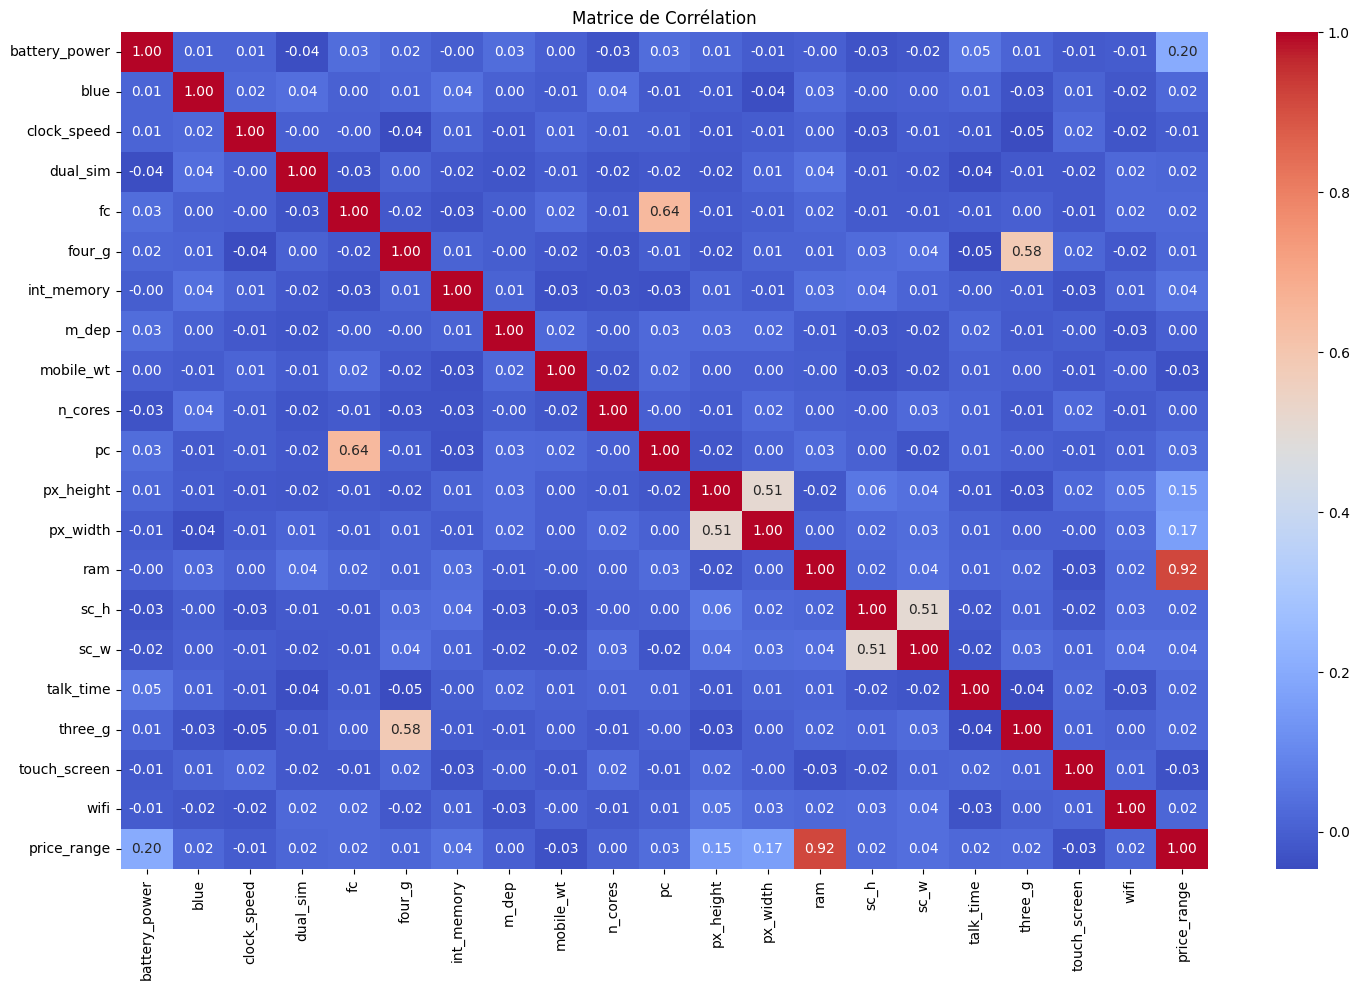

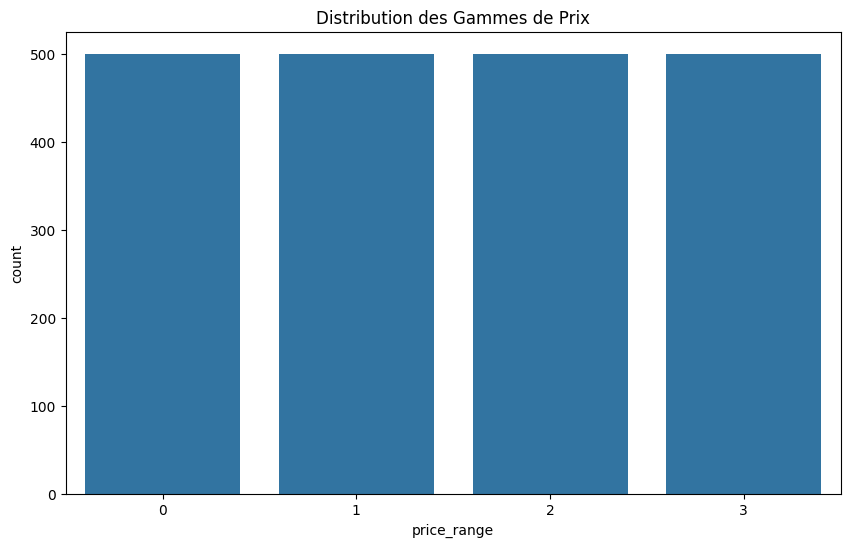

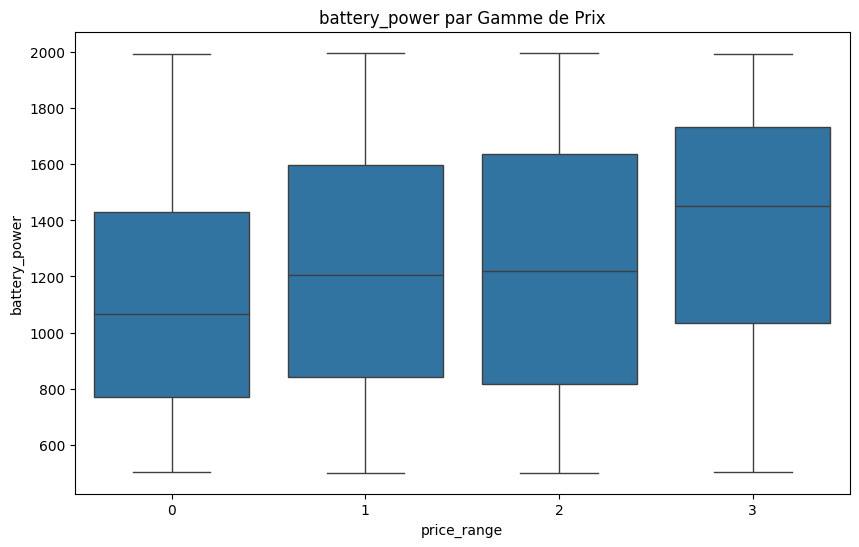

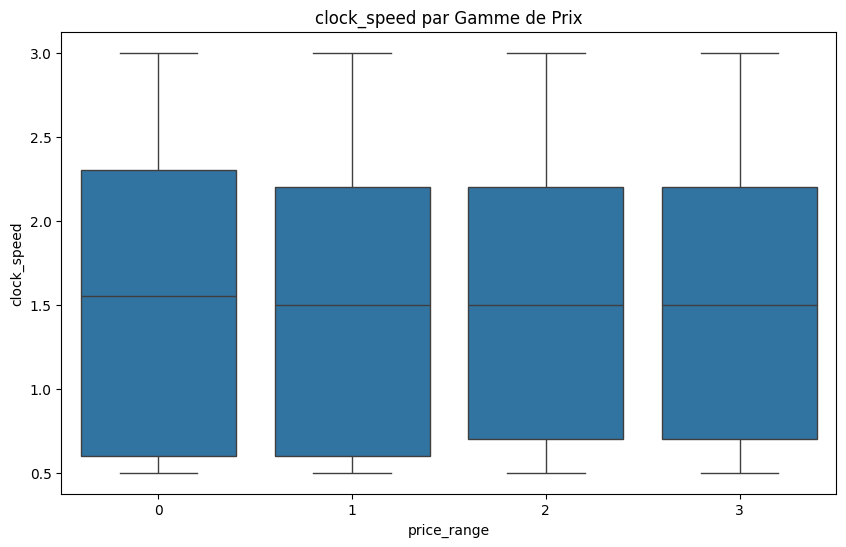

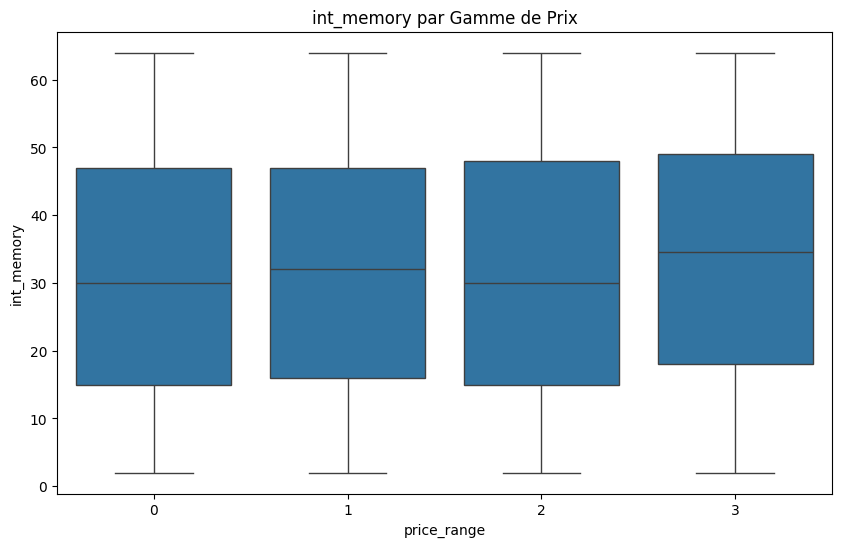

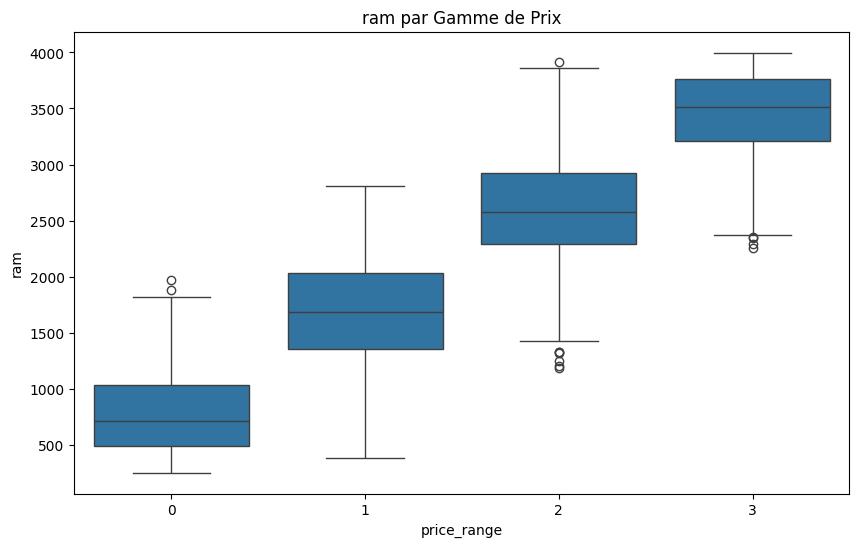

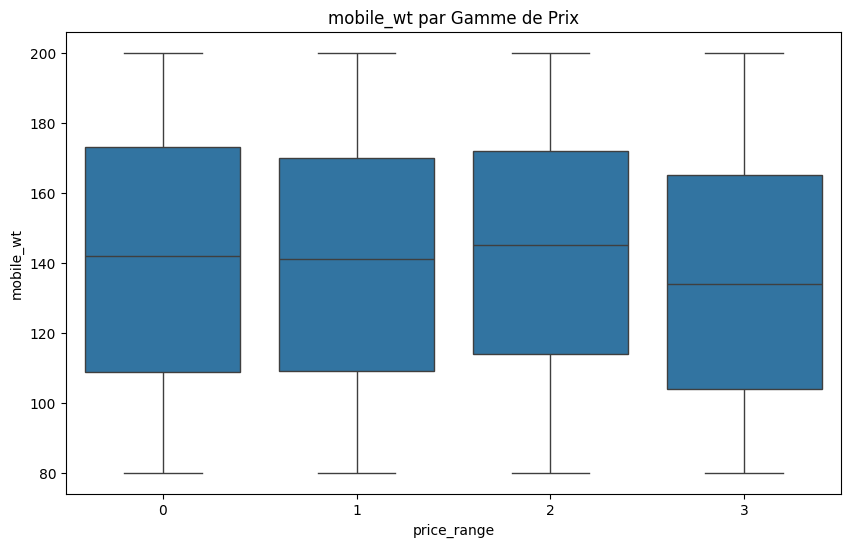

In [10]:
# 4. Data Visualization
# Création d'un dossier pour les visualisations
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show() 
plt.savefig('visualizations/correlation_matrix.png')
plt.close()

# Distribution du prix
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range')
plt.title('Distribution des Gammes de Prix')
plt.show() 
plt.savefig('visualizations/price_distribution.png')
plt.close()

# Boxplots pour les variables numériques principales
numerical_features = ['battery_power', 'clock_speed', 'int_memory', 'ram', 'mobile_wt']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='price_range', y=feature)
    plt.title(f'{feature} par Gamme de Prix')
    plt.show() 
    plt.savefig(f'visualizations/{feature}_boxplot.png')
    plt.close()

In [12]:
# 5. Insight Synthesis and Conclusion
print("\n=== SYNTHÈSE ET CONCLUSIONS ===")

# 1. Déterminants clés du prix
print("\n1. DÉTERMINANTS CLÉS DU PRIX")
# Afficher les corrélations les plus importantes avec le prix
top_correlations = correlation_matrix['price_range'].sort_values(ascending=False)
print("\nFacteurs les plus influents sur le prix (corrélations) :")
print(top_correlations)

# 2. Analyse des distributions
print("\n2. ANALYSE DES DISTRIBUTIONS PAR GAMME DE PRIX")
for feature in numerical_features:
    grouped_stats = df.groupby('price_range')[feature].agg(['mean', 'median', 'std'])
    print(f"\nStatistiques pour {feature}:")
    print(grouped_stats)

# 3. Tests statistiques et significativité
print("\n3. SIGNIFICATIVITÉ STATISTIQUE")
significant_features = []
for feature in numerical_features:
    f_stat, p_val = stats.f_oneway(*[group[feature].values 
                                    for name, group in df.groupby('price_range')])
    if p_val < 0.05:
        significant_features.append((feature, f_stat, p_val))

print("\nCaractéristiques statistiquement significatives :")
for feature, f_stat, p_val in sorted(significant_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: F-stat = {f_stat:.2f}, p-value = {p_val:.4f}")


# 4. Résumé des découvertes inattendues
print("\n4. DÉCOUVERTES SIGNIFICATIVES")
# Calculer les ratios et tendances inhabituelles
price_distribution = df['price_range'].value_counts(normalize=True)
print("\nDistribution des gammes de prix :")
print(price_distribution)




=== SYNTHÈSE ET CONCLUSIONS ===

1. DÉTERMINANTS CLÉS DU PRIX

Facteurs les plus influents sur le prix (corrélations) :
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

2. ANALYSE DES DISTRIBUTIONS PAR GAMME DE PRIX

Statistiques pour battery_power:
                 mean  median         std
price_range                              
0            1116.902  1066.0  410.801305
1            1228.868  1206.0  438.614528
2            1228.320  1219.5  452.863065
3      